In [9]:
from pymatgen import MPRester, Lattice
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.analysis.diffraction.core import  AbstractDiffractionPatternCalculator

with MPRester("9wTHQsK9w5bFPNrGws") as key:
    structure = key.get_structure_by_material_id("mp-15791") # importe la structure du matériau depuis le site materialproject
    structure_object = SpacegroupAnalyzer(structure) # crée un objet de la classe 'SpacegroupeAnalyzer'
    structure2 = structure_object.get_primitive_standard_structure()
    
    structureToWrite = CifWriter(structure2)
    structureToWrite.write_file('mp-15791.cif') # enregistre la structure du matériau dans un fichier .cif

In [10]:
xrd_object = XRDCalculator() # crée un objet de la classe XRDCalculator qui sert à récupérer le diffractogramme
xrd_pattern = xrd_object.get_pattern(structure2) # récupère le pattern grâce à la strucuture 

xrd_angles = xrd_pattern.x # tableau avec tous les angles 2*theta
xrd_hkl = xrd_pattern.hkls # tableau avec tous les indices hkl associés aux angles 

print("Le premier pic est donné pour un angle 2*theta = ")
print(xrd_angles[0])
print("et est associé au vecteur")
print(xrd_hkl[0][0])


Le premier pic est donné pour un angle 2*theta = 
14.356491370542454
et est associé au vecteur
{'hkl': (1, 1, 1), 'multiplicity': 2}


In [11]:
print("Le second pic est donné pour un angle 2*theta = ")
print(xrd_angles[1])
print("et est associé au vecteur")
print(xrd_hkl[1][0])

Le second pic est donné pour un angle 2*theta = 
26.991882752556158
et est associé au vecteur
{'hkl': (1, 0, 0), 'multiplicity': 6}


In [12]:
print("Le troisième pic est donné pour un angle 2*theta = ")
print(xrd_angles[2])
print("et est associé au vecteur")
print(xrd_hkl[2][0])

Le troisième pic est donné pour un angle 2*theta = 
28.277747921697514
et est associé au vecteur
{'hkl': (1, 1, 0), 'multiplicity': 6}


Plot des trois premiers pics :


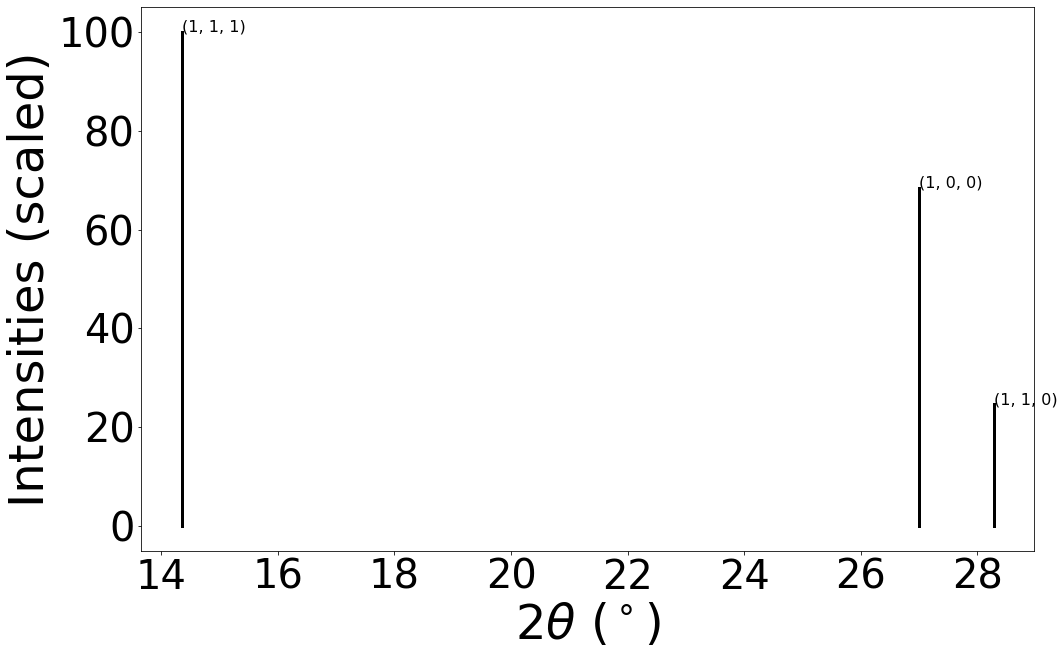

In [20]:
print("Plot des trois premiers pics :")
xrd_object.show_plot(structure, two_theta_range=(0, 28.28), annotate_peaks=True, ax=None, with_labels=True)